In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = 'pdfs'#'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study = flotilla.embark('singlecell_pnm_figure4_voyages', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (11,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-04-28 14:01:40	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages/datapackage.json
2016-04-28 14:01:40	Parsing datapackage to create a Study object
2016-04-28 14:02:27	Initializing Study
2016-04-28 14:02:27	Initializing Predictor configuration manager for Study
2016-04-28 14:02:27	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-04-28 14:02:27	Added ExtraTreesClassifier to default predictors
2016-04-28 14:02:27	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-04-28 14:02:27	Added ExtraTreesRegressor to default predictors
2016-04-28 14:02:27	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-04-28 14:02:27	Added GradientBoostingClassifier to default predictors
2016-04-28 14:02:27	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gra

In [3]:
import itertools

genes_to_plot = 'MAP4K4', 'MEAF6', 'EWSR1', 'PPHLN1', 'STRA13', 'ZNF207', 'THYN1'
events_to_plot = list(itertools.chain(*[study.splicing.maybe_renamed_to_feature_id(x) for x in genes_to_plot]))
events_to_plot

['exon:chr2:102450871-102450925:+@exon:chr2:102452362-102452440:+@exon:chr2:102456281-102456456:+',
 'exon:chr2:102452362-102452440:+@exon:chr2:102456281-102456456:+@exon:chr2:102459071-102459143:+',
 'exon:chr2:102472439-102472600:+@exon:chr2:102475458-102475544:+@exon:chr2:102476105-102476326:+',
 'exon:chr2:102476105-102476326:+@exon:chr2:102477287-102477448:+@exon:chr2:102480283-102480513:+',
 'exon:chr2:102476105-102476326:+@exon:chr2:102477287-102477448:+@exon:chr2:102481392-102481498:+',
 'exon:chr2:102476105-102476326:+@exon:chr2:102480283-102480513:+@exon:chr2:102481392-102481498:+',
 'exon:chr2:102486757-102486877:+@exon:chr2:102487956-102488147:+@exon:chr2:102490109-102490226:+',
 'exon:chr2:102476105-102476326:+@exon:chr2:102477287-102477448:+@exon:chr2:102480283-102480513:+@exon:chr2:102481392-102481498:+',
 'exon:chr1:37967405-37967597:-@exon:chr1:37961486-37961519:-@exon:chr1:37958176-37959708:-',
 'exon:chr1:37962308-37962337:-@exon:chr1:37962148-37962205:-@exon:chr1:37

## Violinplots

mkdir: cannot create directory `pdfs/violinplots': File exists


/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


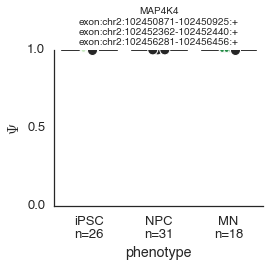

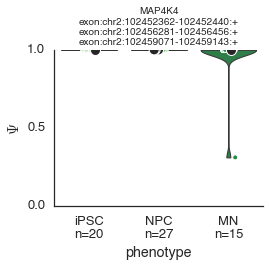

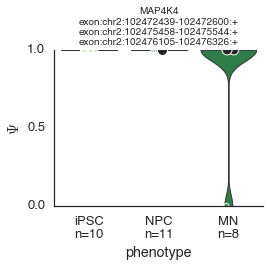

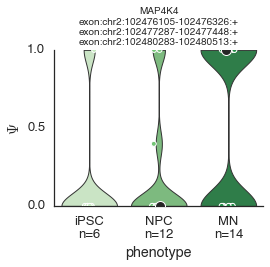

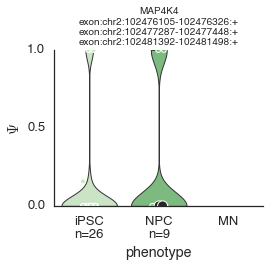

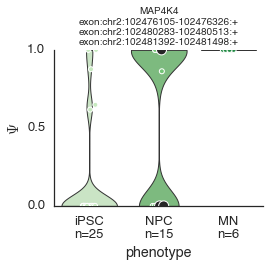

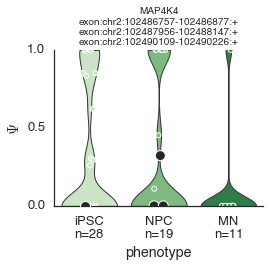

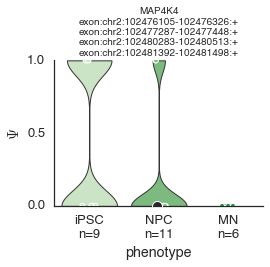

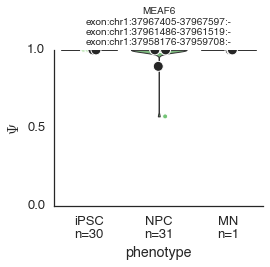

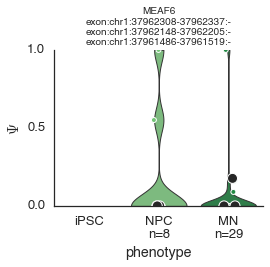

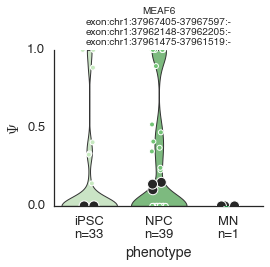

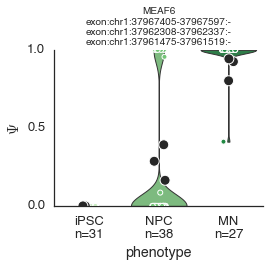

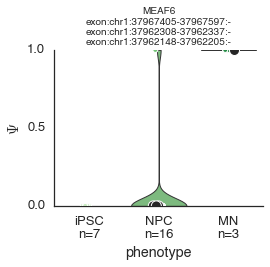

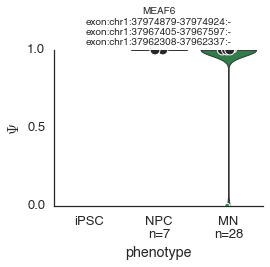

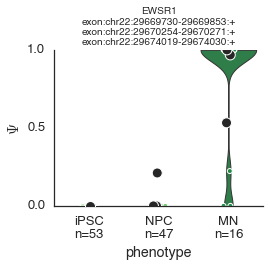

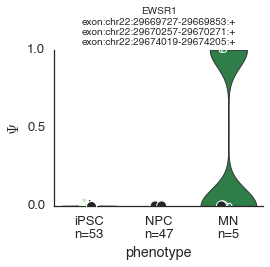

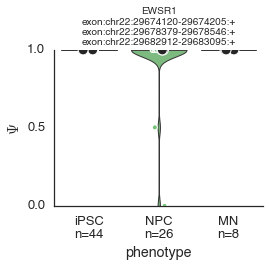

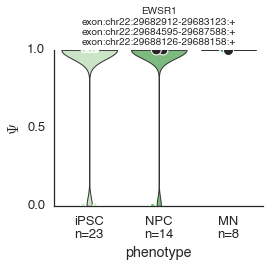

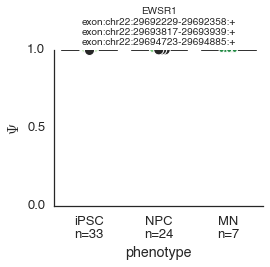

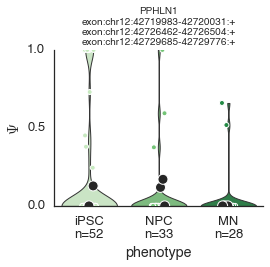

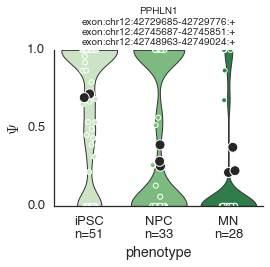

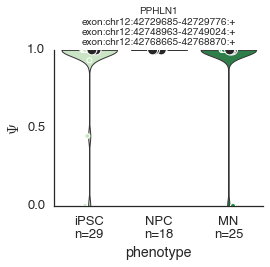

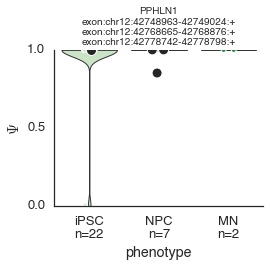

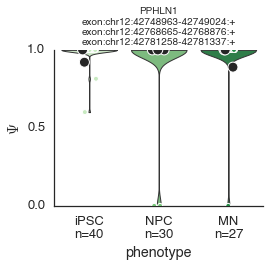

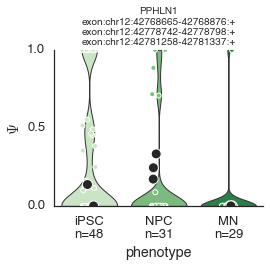

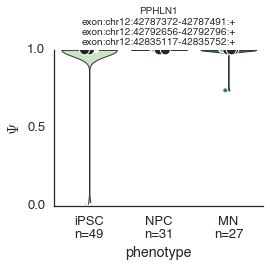

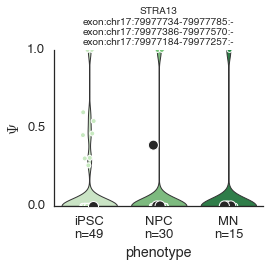

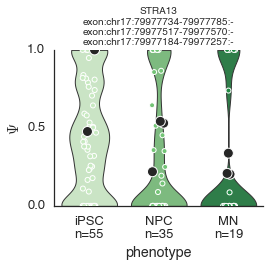

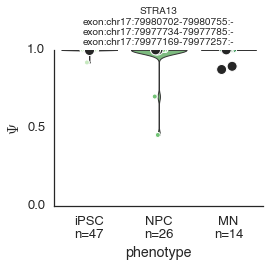

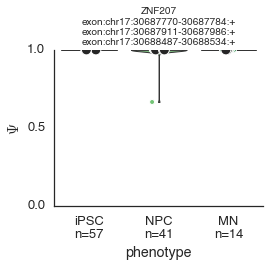

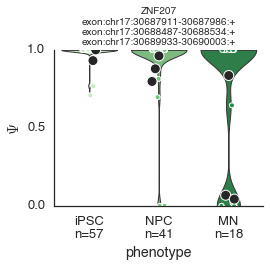

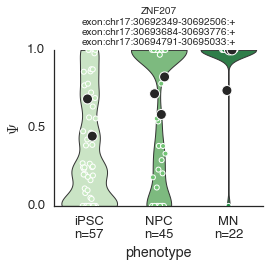

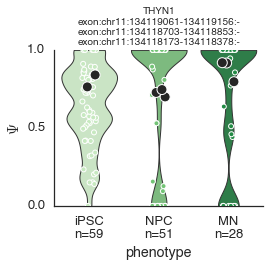

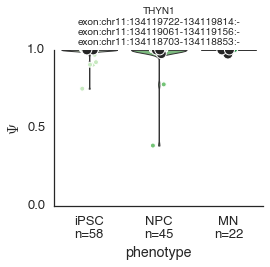

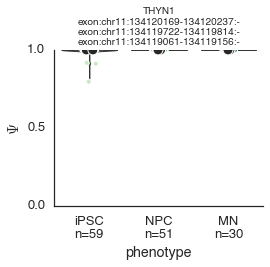

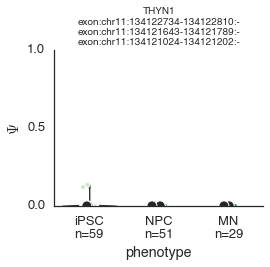

In [5]:

violinplot_folder = '{}/violinplots'.format(folder)
! mkdir $violinplot_folder

for event in events_to_plot:
    gene_name = study.splicing.feature_data['gene_name'][event]
    study.plot_event(event, sample_subset='~outlier')
    fig = plt.gcf()
    fig.savefig('{}/{}_{}.pdf'.format(violinplot_folder, gene_name, event))

## Voyageplots

In [7]:
import bonvoyage

In [15]:
waypoints_index = study.supplemental.waypoints.set_index('Unnamed: 1', append=True)
waypoints_index = waypoints_index.swaplevel(0, 1)
waypoints_index = waypoints_index.sort_index()
waypoints_index.head()

,,0,1
Unnamed: 1,phenotype,,
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,iPSC,2.220446e-16,0.965517
exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,iPSC,2.220446e-16,0.870968
exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,iPSC,1.282051e-01,0.589744
exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,iPSC,1.110223e-16,0.966667
exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,iPSC,2.220446e-16,1.000000


In [21]:
df = waypoints_index.loc[events_to_plot[0]]
df

,0,1
phenotype,,
NPC,2.220446e-16,1
iPSC,2.220446e-16,1


In [22]:
for color, s in df.groupby(study.phenotype_to_color):
    print s.iloc[:, 0]

phenotype
NPC    2.220446e-16
Name: 0, dtype: float64
phenotype
iPSC    2.220446e-16
Name: 0, dtype: float64


In [29]:
import bonvoyage

In [ ]:
voyageplot_folder = '{}/voyageplots'.format(folder)
! mkdir $voyageplot_folder

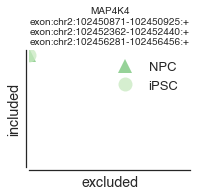

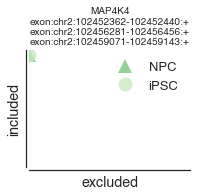

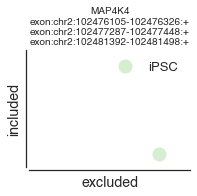

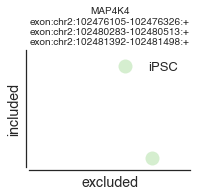

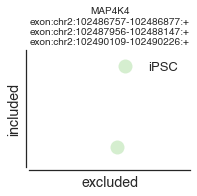

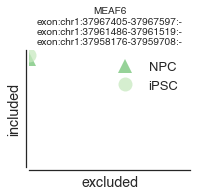

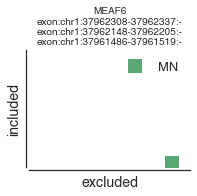

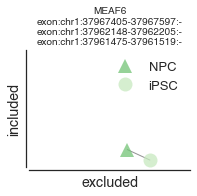

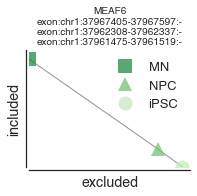

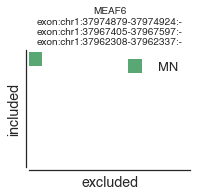

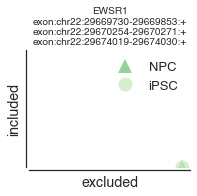

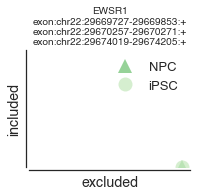

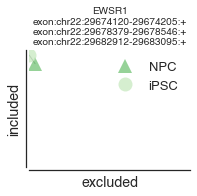

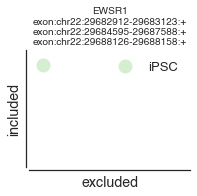

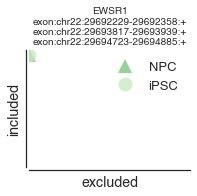

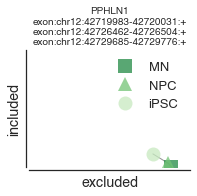

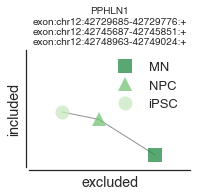

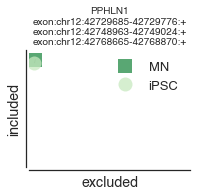

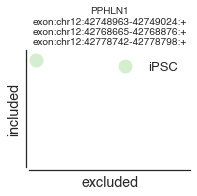

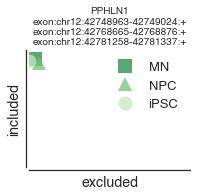

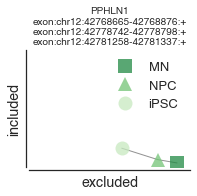

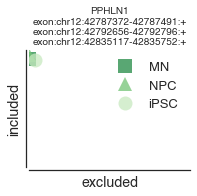

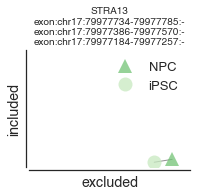

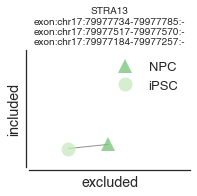

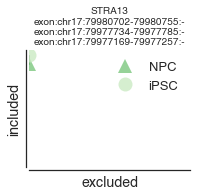

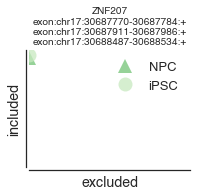

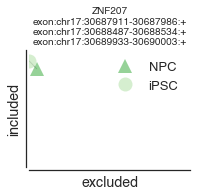

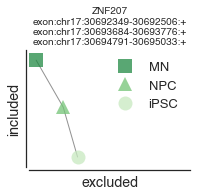

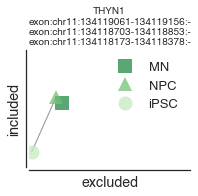

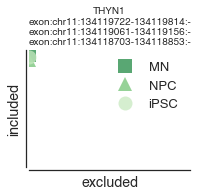

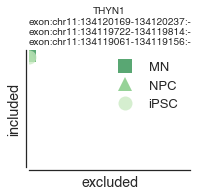

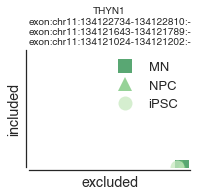

In [35]:
for event in events_to_plot:
    
    if event in waypoints_index.index:
        gene_name = study.splicing.feature_data['gene_name'][event]
        fig, ax = plt.subplots(figsize=(3, 3))
        bonvoyage.visualize.voyageplot(waypoints_index, event, 
                                       study.phenotype_to_color, study.phenotype_to_marker, 
                   study.phenotype_order, ax=ax)
    #     fig = plt.gcf() 
        sns.despine()
        title = '{}\n{}'.format(gene_name, '\n'.join(event.split('@')))
        ax.set_title(title, fontsize=10)
        fig.tight_layout()
        fig.savefig('{}/{}_{}.pdf'.format(voyageplot_folder, gene_name, event))

In [17]:
bonvoyage.visualize.voyageplot??